In [233]:
#import libraries
#numerical
import pandas as pd
import numpy as np
from empiricaldist import Cdf,Pmf

#plotting
import matplotlib.pyplot as plt
import seaborn as sns


#For mapping
import contextily as ctx
import geopandas as gpd
import geoplot
import shapely
from shapely.geometry import MultiPoint
from geopandas.tools import overlay



pd.set_option('display.max_columns', 23000)

In [2]:
!ls

glossary.pdf	      rollingsales_bronx.xls	     ZIP_CODE_040114
LICENSE		      rollingsales_brooklyn.xls      ZIP_CODE_040114.shp
NYC_EDA.ipynb	      rollingsales_manhattan.xls     ZIP_CODE_040114.zip
nyc-rolling-data.csv  rollingsales_queens.xls
README.md	      rollingsales_statenisland.xls


In [3]:
df_manhattan =pd.read_excel('rollingsales_manhattan.xls')
df_bronx = pd.read_excel('rollingsales_bronx.xls')
df_brooklyn = pd.read_excel('rollingsales_brooklyn.xls')
df_queens = pd.read_excel('rollingsales_queens.xls')
df_staten = pd.read_excel('rollingsales_statenisland.xls')

# Check all borough dataframes

In [4]:
df_manhattan.head()

,Manhattan Rolling Sales File. All Sales From April 2019 - March 2020.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,10009,1,1,2,2090,3680,1940,1,S1,3200000,2019-07-24 00:00:00


In [5]:
df_bronx.head()

,Bronx Rolling Sales File. All Sales From April 2019 - March 2020.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,10457,1,0,1,1622,1587,1899,1,A1,458000,2020-01-31 00:00:00


In [6]:
df_brooklyn.head()

,Brooklyn Rolling Sales File. All Sales From April 2019 - March 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,48,NaN,A5,14 BAY 10TH STREET,NaN,11228,1,0,1,2513,1428,1930,1,A5,849000,2020-03-18 00:00:00


In [7]:
df_queens.head()

,Queens Rolling Sales File. All Sales From April 2019 - March 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949,31,NaN,A5,1942 81ST STREET,NaN,11370,1,0,1,1800,1224,1945,1,A5,775000,2019-04-05 00:00:00


In [8]:
df_staten.head()

,Staten Island Rolling Sales File. All Sales From April 2019 - March 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,NaN,A5,4716 AMBOY ROAD,NaN,10312,1,0,1,1871,910,2002,1,A5,0,2019-07-10 00:00:00


In [9]:
frames = [df_manhattan,df_bronx,df_brooklyn,df_queens,df_staten]

In [10]:
#Change column names to row 4 and then delete first 4 rows
for frame in frames:
    columns = []
    for item in frame.iloc[3]:
        columns.append(item)
    # delete rows 0-3
    frame.columns=columns
    frame.drop([0,1,2,3], axis=0, inplace=True)

In [11]:
# to confrim that rows have been deleted and columns renamed
for frame in frames:
    print(frame.head())

  BOROUGH   NEIGHBORHOOD    BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
4       1  ALPHABET CITY    01 ONE FAMILY DWELLINGS                    1   
5       1  ALPHABET CITY    01 ONE FAMILY DWELLINGS                    1   
6       1  ALPHABET CITY    02 TWO FAMILY DWELLINGS                    1   
7       1  ALPHABET CITY  03 THREE FAMILY DWELLINGS                    1   
8       1  ALPHABET CITY  03 THREE FAMILY DWELLINGS                    1   

  BLOCK LOT EASE-MENT BUILDING CLASS AT PRESENT               ADDRESS  \
4   376  43       NaN                        S1   743 EAST 6TH STREET   
5   390  61       NaN                        A4   189 EAST 7TH STREET   
6   404   1       NaN                        B9          166 AVENUE A   
7   377  56       NaN                        C0   263 EAST 7TH STREET   
8   393   9       NaN                        C0  604 EAST 11TH STREET   

  APARTMENT NUMBER ZIP CODE RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  \
4              NaN    1000

In [12]:
# Join all dataframes together

df = pd.concat(frames)

In [13]:
len(df)

81484

In [14]:
# to confirm that all the records are in the new dataframe
length=0
for frame in frames:
    length+= len(frame)
print(length)

81484


In [15]:
# All files  added can be output to a csv file
#df.to_csv('nyc-rolling-data.csv', index=False)
df = pd.read_csv('nyc-rolling-data.csv')

In [16]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,10009.0,1.0,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000,2019-07-24 00:00:00
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2019-09-25 00:00:00
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2019-07-22 00:00:00
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,NaN,10009.0,3.0,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000,2019-04-30 00:00:00
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,NaN,C0,604 EAST 11TH STREET,NaN,10009.0,3.0,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0,2019-10-24 00:00:00


In [17]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [18]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,81484.000000,81484.000000,81484.000000,0.0,81471.000000,64556.000000,64556.000000,64556.000000,6.455600e+04,6.455600e+04,75466.000000,81484.000000,8.148400e+04
mean,2.982843,4399.424390,359.265574,NaN,10855.408624,2.370004,0.359099,2.729103,6.055451e+03,4.191151e+03,1950.610407,1.621410,1.515302e+06
std,1.282482,3668.023018,651.796121,NaN,562.482018,35.965798,6.649820,36.769705,1.492579e+05,5.235966e+04,35.083675,0.793135,1.355213e+07
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1018.000000,1.000000,0.000000e+00
25%,2.000000,1348.000000,22.000000,NaN,10306.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1925.000000,1.000000,0.000000e+00
50%,3.000000,3537.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.042000e+03,1.478000e+03,1945.000000,1.000000,4.775000e+05
75%,4.000000,6540.000000,360.000000,NaN,11358.000000,2.000000,0.000000,2.000000,3.125000e+03,2.372000e+03,1970.000000,2.000000,9.000000e+05
max,5.000000,16350.000000,9116.000000,NaN,11697.000000,8764.000000,842.000000,8812.000000,1.985040e+07,8.942176e+06,2020.000000,4.000000,2.155000e+09


# Some properties have a land square feet and or a gross square feet of 0
# This should be wrong

In [19]:
df[df['LAND SQUARE FEET'] == 0]


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
104,1,ALPHABET CITY,11 SPECIAL CONDO BILLING LOTS,4,377,1204,NaN,RK,"101 AVENUE D, B-1",B-1,10009.0,0.0,1.0,1.0,0.0,0.0,2010.0,2,RR,5100000,2019-12-13 00:00:00
105,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,393,1007,NaN,R2,"642-646 EAST 11TH STREET, C2",C2,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,0,2019-12-02 00:00:00
106,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,393,1030,NaN,R2,"383 E 10TH STREET, B4",B4,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,1190000,2020-03-16 00:00:00
107,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398,1020,NaN,R2,"182 EAST 2ND STREET, 3F",3F,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,0,2019-07-12 00:00:00
108,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1007,NaN,R4,"324 EAST 4TH STREET, 5A",5A,10009.0,1.0,0.0,1.0,0.0,0.0,1920.0,2,R4,825000,2020-03-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81356,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7094,54,NaN,A5,56 BERKSHIRE LANE,NaN,10309.0,1.0,0.0,1.0,0.0,0.0,2017.0,1,A5,733140,2019-04-11 00:00:00
81360,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7105,149,NaN,A5,14 APRICOT COURT,NaN,10309.0,1.0,0.0,1.0,0.0,0.0,2017.0,1,A5,671454,2019-04-12 00:00:00
81446,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7094,40,NaN,B9,79 BERKSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2017.0,1,B9,152100,2019-04-15 00:00:00
81480,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,48,NaN,B9,108 BERKSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,1,V0,599701,2019-04-24 00:00:00


In [20]:
df[df['GROSS SQUARE FEET'] == 0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
104,1,ALPHABET CITY,11 SPECIAL CONDO BILLING LOTS,4,377,1204,NaN,RK,"101 AVENUE D, B-1",B-1,10009.0,0.0,1.0,1.0,0.0,0.0,2010.0,2,RR,5100000,2019-12-13 00:00:00
105,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,393,1007,NaN,R2,"642-646 EAST 11TH STREET, C2",C2,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,0,2019-12-02 00:00:00
106,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,393,1030,NaN,R2,"383 E 10TH STREET, B4",B4,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,1190000,2020-03-16 00:00:00
107,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398,1020,NaN,R2,"182 EAST 2ND STREET, 3F",3F,10009.0,1.0,0.0,1.0,0.0,0.0,NaN,2,R2,0,2019-07-12 00:00:00
108,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1007,NaN,R4,"324 EAST 4TH STREET, 5A",5A,10009.0,1.0,0.0,1.0,0.0,0.0,1920.0,2,R4,825000,2020-03-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81446,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7094,40,NaN,B9,79 BERKSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2017.0,1,B9,152100,2019-04-15 00:00:00
81480,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,48,NaN,B9,108 BERKSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,1,V0,599701,2019-04-24 00:00:00
81481,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,49,NaN,B9,35 WILTSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,1,V0,896060,2019-04-22 00:00:00
81482,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,28,NaN,V0,N/A QUAIL LANE,NaN,10309.0,0.0,0.0,0.0,2640.0,0.0,NaN,1,V0,26000,2019-08-22 00:00:00


There does not seem to be a  common feature among the properties with reported sizes of 0
for the model I will do one with them included and then with them dropped

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81484 entries, 0 to 81483
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         81484 non-null  int64  
 1   NEIGHBORHOOD                    81484 non-null  object 
 2   BUILDING CLASS CATEGORY         81484 non-null  object 
 3   TAX CLASS AT PRESENT            81258 non-null  object 
 4   BLOCK                           81484 non-null  int64  
 5   LOT                             81484 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       81258 non-null  object 
 8   ADDRESS                         81484 non-null  object 
 9   APARTMENT NUMBER                18010 non-null  object 
 10  ZIP CODE                        81471 non-null  float64
 11  RESIDENTIAL UNITS               64556 non-null  float64
 12  COMMERCIAL UNITS                

In [22]:
# Percentage of null values in each columns
100*df.isnull().sum()/len(df)

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.277355
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.277355
ADDRESS                             0.000000
APARTMENT NUMBER                   77.897501
ZIP CODE                            0.015954
RESIDENTIAL UNITS                  20.774631
COMMERCIAL UNITS                   20.774631
TOTAL UNITS                        20.774631
LAND SQUARE FEET                   20.774631
GROSS SQUARE FEET                  20.774631
YEAR BUILT                          7.385499
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                          0.000000
SALE DATE                           0.000000
dtype: float64

In [23]:
#A $0 sale indicates that there was a transfer of ownership without a cash consideration. 
100*len(df[df['SALE PRICE'] == 0])/len(df)

30.365470521820235

# ~30.37% of properties transfered without a cash consideration
### Since the purpose is to predict the sale price these can be taken out it might be interesting to see if  there are any similarities or differences between properties that are transfered without a cash consideration

In [24]:
# Since the first two characters of the building class are digits it is possible to parse them and change the 
#type to a number type
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].str[0:2]
df['BUILDING CLASS CATEGORY'].astype(int)
# EASE-MENT has 100% NaN values APARTMENT has >70% NaN so they will be dropped
df.drop(columns=['EASE-MENT','APARTMENT NUMBER'], inplace=True)


In [25]:
df_nosale=df[df['SALE PRICE'] == 0]
df = df[df['SALE PRICE'] != 0]

In [26]:
len(df['BUILDING CLASS CATEGORY'].unique())

44

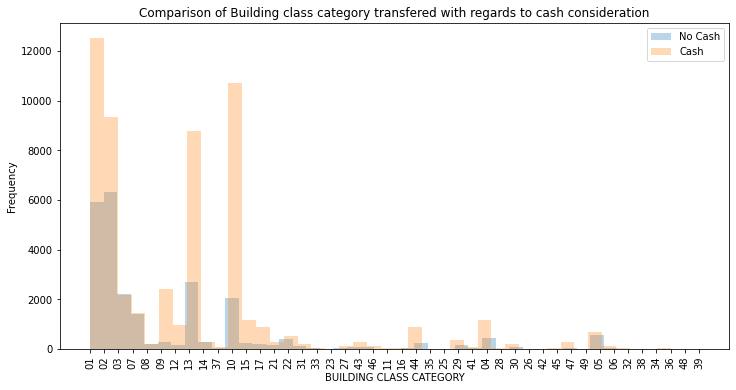

In [27]:
plt.figure(figsize=(12,6))
plt.hist(df_nosale['BUILDING CLASS CATEGORY'],alpha=.3,label='No Cash',bins = 44)
plt.hist(df['BUILDING CLASS CATEGORY'],alpha=.3,label='Cash',bins = 44)
plt.title('Comparison of Building class category transfered with regards to cash consideration')
plt.legend()
plt.xlabel('BUILDING CLASS CATEGORY')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

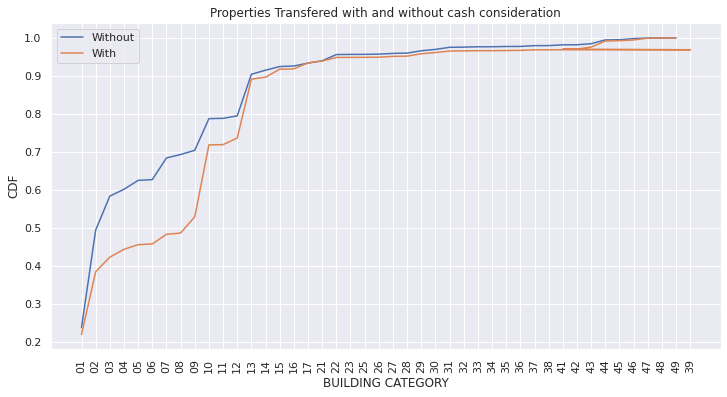

In [28]:
sns.set()
plt.figure(figsize=(12,6))
nosale_class_cdf = Cdf.from_seq(df_nosale['BUILDING CLASS CATEGORY'])
class_cdf = Cdf.from_seq(df['BUILDING CLASS CATEGORY'])
#class_cdf.plot()
nosale_class_cdf.plot(label='Without')
class_cdf.plot(label='With')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('BUILDING CATEGORY')
plt.ylabel('CDF')

plt.title('Properties Transfered with and without cash consideration')
plt.show()


In [29]:
df.groupby('BOROUGH')['SALE PRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
1,13802.0,5.120617e+06,3.118279e+07,1.0,685000.0,1230857.5,2600000.0,2.155000e+09
2,5271.0,1.124038e+06,4.136102e+06,1.0,259000.0,495000.0,710000.0,8.900000e+07
3,14955.0,1.652125e+06,5.610998e+06,1.0,519485.0,810000.0,1329500.0,1.500000e+08
4,17422.0,1.081403e+06,6.454264e+06,1.0,358000.0,590000.0,870000.0,3.375345e+08
5,5291.0,6.285320e+05,1.635849e+06,1.0,395000.0,535000.0,675000.0,9.272502e+07


In [30]:
df_class_category=df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].describe()
df_class_category['mean']=df_class_category['mean']/1000000
df_class_category['std']=df_class_category['std']/1000000

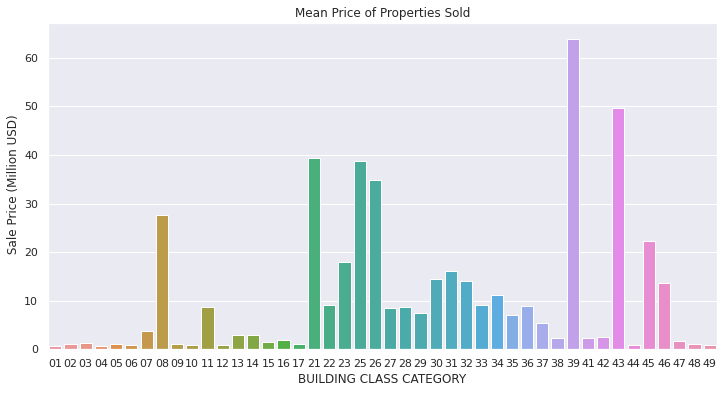

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(y='mean',x=df_class_category.index,data=df_class_category)
plt.ylabel(' Sale Price (Million USD)')
plt.title('Mean Price of Properties Sold')
plt.show()

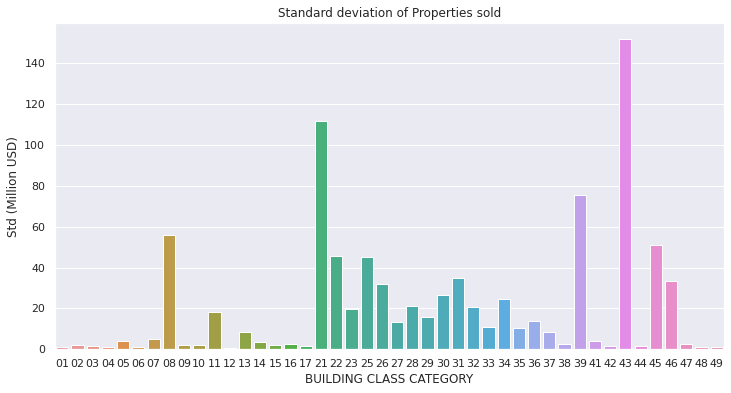

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(y='std',x=df_class_category.index,data=df_class_category)
plt.ylabel('Std (Million USD)')
plt.title('Standard deviation of Properties sold')
plt.show()

# BUILDING CLASS 21 , 43 and 39 have the top mean price and the top 3 standard deviation

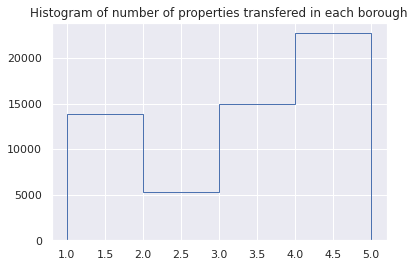

In [33]:
plt.hist(df.BOROUGH,bins=4,histtype='step')

plt.title('Histogram of number of properties transfered in each borough')
plt.show()

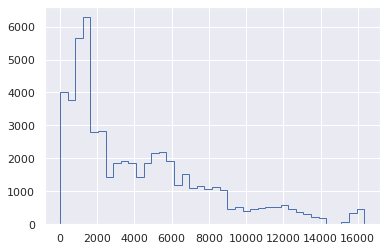

In [34]:
plt.hist(df['BLOCK'],bins=40,histtype='step')
plt.show()

In [35]:
df['AGE OF BUILDING'] = 2020 -df['YEAR BUILT']

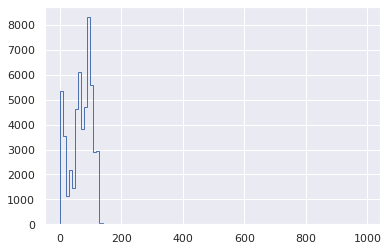

In [36]:
df['AGE OF BUILDING'].hist(bins=100,histtype='step')

In [37]:
df['BOROUGH'].dtype

dtype('int64')

In [38]:
df['AGE OF BUILDING'].dtype

dtype('float64')

In [39]:
df['SALE PRICE'].dtype

dtype('int64')

In [40]:
df['TAX CLASS AT PRESENT'].unique()

array(['1', '2', '2A', '2B', '2C', '4', '1C', nan, '1A', '1B', '1D'],
      dtype=object)

In [41]:
df['TAX CLASS AT TIME OF SALE'].unique()

array([1, 2, 4])

In [42]:
df['SALE PRICE'].describe()

count    5.674100e+04
mean     2.176078e+06
std      1.619606e+07
min      1.000000e+00
25%      4.410000e+05
50%      7.000000e+05
75%      1.200000e+06
max      2.155000e+09
Name: SALE PRICE, dtype: float64

In [43]:
df.BOROUGH=df['BOROUGH'].astype(float)
df['AGE OF BUILDING']=df['AGE OF BUILDING'].astype(float)
df['SALE PRICE']=df['SALE PRICE'].astype(float)
df['TAX CLASS AT TIME OF SALE']=df['TAX CLASS AT TIME OF SALE'].astype(float)
df.BLOCK=df.BLOCK.astype(float)
#df['ZIP CODE']=df['ZIP CODE'].astype(object)
df['TOTAL UNITS']=df['TOTAL UNITS'].astype(float)

In [44]:
df[['BOROUGH','SALE PRICE','AGE OF BUILDING','TAX CLASS AT TIME OF SALE','ZIP CODE','TOTAL UNITS']].corr(method = 'spearman')


,BOROUGH,SALE PRICE,AGE OF BUILDING,TAX CLASS AT TIME OF SALE,ZIP CODE,TOTAL UNITS
BOROUGH,1.000000,-0.323644,-0.086976,-0.455175,0.651377,-0.014432
SALE PRICE,-0.323644,1.000000,0.025073,0.155076,-0.264418,0.129570
AGE OF BUILDING,-0.086976,0.025073,1.000000,-0.236822,0.093991,0.323939
TAX CLASS AT TIME OF SALE,-0.455175,0.155076,-0.236822,1.000000,-0.333777,-0.221304
ZIP CODE,0.651377,-0.264418,0.093991,-0.333777,1.000000,0.109866
TOTAL UNITS,-0.014432,0.129570,0.323939,-0.221304,0.109866,1.000000


In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

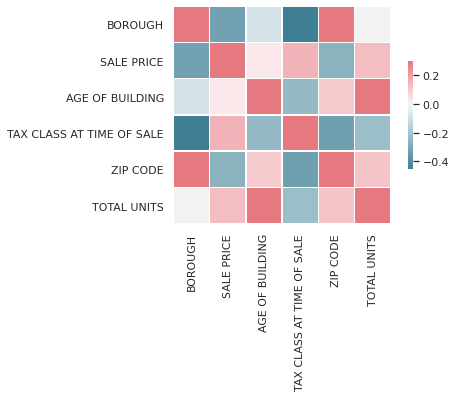

In [46]:
sns.heatmap(df[['BOROUGH','SALE PRICE','AGE OF BUILDING','TAX CLASS AT TIME OF SALE','ZIP CODE','TOTAL UNITS']].corr(method = 'spearman'),cmap=cmap , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
df.groupby('TAX CLASS AT PRESENT')['BOROUGH'].count()

TAX CLASS AT PRESENT
1     24050
1A     1064
1B      679
1C      110
1D      115
2     23917
2A     1028
2B      344
2C     1674
4      3704
Name: BOROUGH, dtype: int64

In [48]:
df_nosale.groupby('TAX CLASS AT PRESENT')['BOROUGH'].count()

TAX CLASS AT PRESENT
1     14470
1A      382
1B      577
1C       60
1D       26
2      5731
2A     1082
2B      299
2C      321
4      1625
Name: BOROUGH, dtype: int64

# Zip code cloropleth

In [49]:
zip_code_sale_price=df.groupby('ZIP CODE')[['SALE PRICE']].mean()

In [50]:
zip_code_sale_price['STD']=df.groupby('ZIP CODE')[['SALE PRICE']].std()

In [51]:
zip_code_sale_price['ZIPCODE']=zip_code_sale_price.index

In [52]:
name = np.arange(0,192)
print(name)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]


In [57]:
zip_code_sale_price['index']=name

In [58]:
zip_code_sale_price.set_index('index')

,SALE PRICE,STD,ZIPCODE
index,,,
0,1.482842e+07,1.225747e+08,10001.0
1,2.479718e+06,6.862115e+06,10002.0
2,1.080926e+07,2.437670e+07,10003.0
3,7.401800e+06,2.864384e+07,10004.0
4,3.041963e+06,1.870455e+07,10005.0
...,...,...,...
187,3.266424e+06,8.866739e+06,11691.0
188,1.966227e+06,4.099102e+06,11692.0
189,4.136777e+05,7.264879e+05,11693.0


In [59]:
zip_code_sale_price.head()

,SALE PRICE,STD,ZIPCODE,index
ZIP CODE,,,,
10001.0,1.482842e+07,1.225747e+08,10001.0,0
10002.0,2.479718e+06,6.862115e+06,10002.0,1
10003.0,1.080926e+07,2.437670e+07,10003.0,2
10004.0,7.401800e+06,2.864384e+07,10004.0,3
10005.0,3.041963e+06,1.870455e+07,10005.0,4


In [61]:
zip_codes=gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')

In [62]:
zip_codes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [79]:

zip_codes=pd.merge(zip_codes, zip_code_sale_price, on='ZIPCODE')

In [75]:
zip_code_sale_price['ZIPCODE']=zip_code_sale_price['ZIPCODE'].astype(float)
zip_codes['ZIPCODE']=zip_codes['ZIPCODE'].astype(float)

In [78]:
zip_code_sale_price.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 192 entries, 10001.0 to 11697.0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SALE PRICE  192 non-null    float64
 1   STD         185 non-null    float64
 2   ZIPCODE     192 non-null    float64
 3   index       192 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.5 KB


In [80]:
zip_codes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,SALE PRICE,STD,index
0,11436.0,0,Jamaica,18681,2.26993e+07,NY,Queens,36,081,http://www.usps.com/,0,0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4.554608e+05,2.031968e+05,186
1,11213.0,0,Brooklyn,62426,2.9631e+07,NY,Kings,36,047,http://www.usps.com/,0,0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",1.178842e+06,2.220813e+06,112
2,11212.0,0,Brooklyn,83866,4.19721e+07,NY,Kings,36,047,http://www.usps.com/,0,0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",1.696954e+06,3.278119e+06,111
3,11225.0,0,Brooklyn,56527,2.36986e+07,NY,Kings,36,047,http://www.usps.com/,0,0,"POLYGON ((995908.365 183617.613, 996522.848 18...",1.504705e+06,2.777401e+06,124
4,11218.0,0,Brooklyn,72280,3.68688e+07,NY,Kings,36,047,http://www.usps.com/,0,0,"POLYGON ((991997.113 176307.496, 992042.798 17...",1.209329e+06,1.744624e+06,117


In [148]:
zip_codes.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

In [151]:
zip_codes["center"] = zip_codes["geometry"].centroid
zip_codes_points = zip_codes.copy()
zip_codes_points.set_geometry("center", inplace = True)

In [182]:
zip_codes["center"] = zip_codes["geometry"].centroid
zip_codes_points = zip_codes.copy()
zip_codes_points.set_geometry("center", inplace = True)

manhattan_points = zip_codes_points['center'][zip_codes_points['COUNTY']=='New York'] 
queens_points = zip_codes_points['center'][zip_codes_points['COUNTY']=='Queens'] 
bronxs_points = zip_codes_points['center'][zip_codes_points['COUNTY']=='Bronx'] 
brooklyn_points = zip_codes_points['center'][zip_codes_points['COUNTY']=='Kings']
staten_points = zip_codes_points['center'][zip_codes_points['COUNTY']=='Richmond'] 
#shapely.MultiPoint()
fstaten_points.head()

128    POINT (957586.243 167392.636)
129    POINT (937618.499 169775.902)
131    POINT (945934.791 169127.012)
137    POINT (958123.120 159832.333)
138    POINT (938581.925 156473.794)
Name: center, dtype: geometry

In [213]:
def points_to_multipoint(x):
    """"Takes an iterable opbject with shapley points and turns it into a multipoint opject"""
    y=[]
    for point in x:
        y.append(point)
    y=MultiPoint(y)
    return y
#get centroid of multipoints   
manhattan=points_to_multipoint(manhattan_points).centroid
queens=points_to_multipoint(queens_points).centroid
bronxs=points_to_multipoint(bronxs_points).centroid
brooklyn=points_to_multipoint(brooklyn_points).centroid
staten=points_to_multipoint(staten_points).centroid


centroids=[manhattan,queens,bronxs,brooklyn,staten]
lables=['Manhattan','Queens','Bronx','Brooklyn','Staten Island']

In [107]:
#change sale price to multiples of a million dollars
zip_codes['SALE PRICE']=zip_codes['SALE PRICE']/1000000

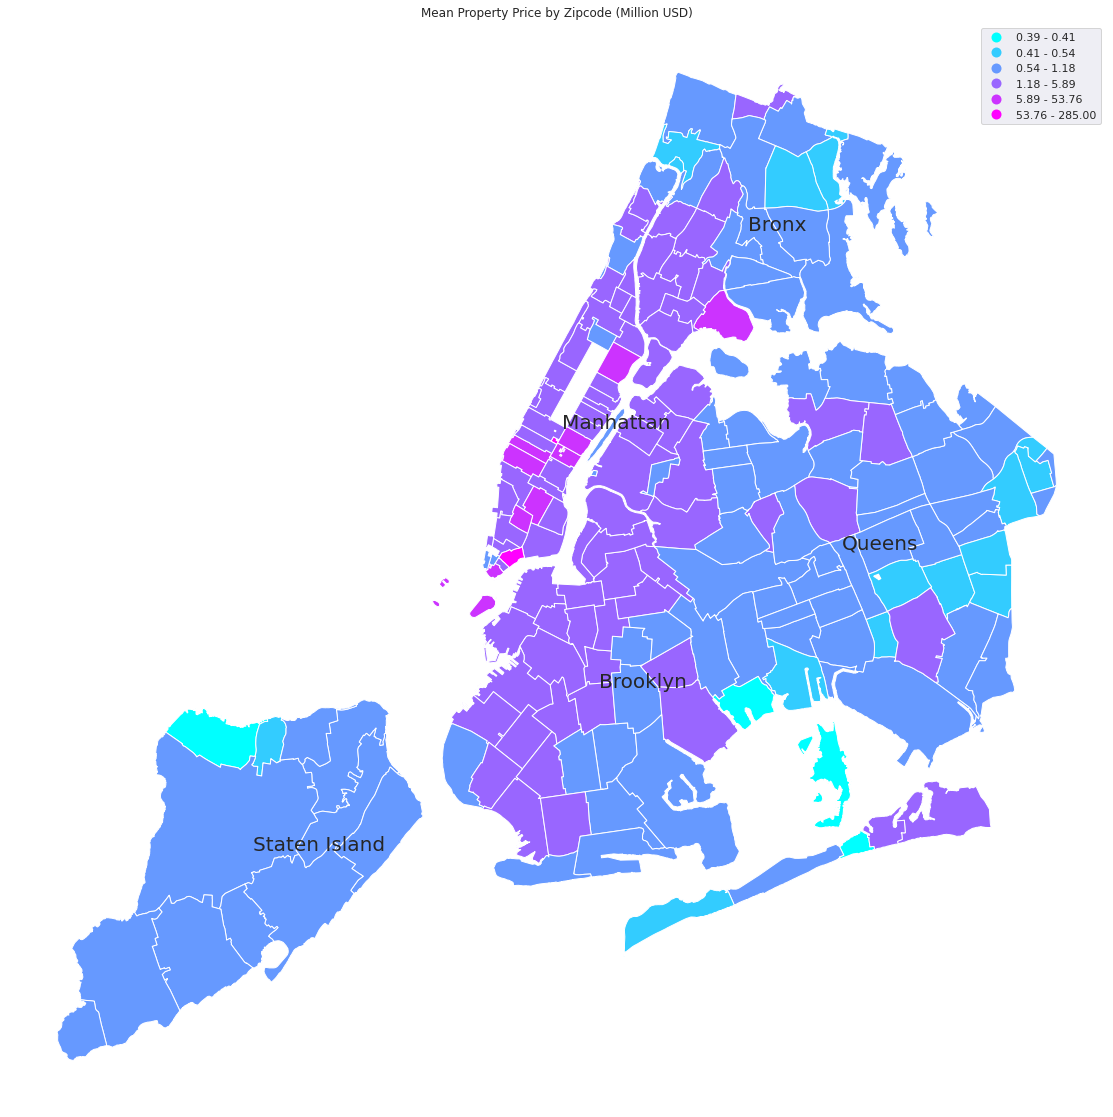

In [248]:

gdf=gpd.GeoDataFrame(zip_codes, geometry=zip_codes.geometry)

ax=(gdf.plot(column='SALE PRICE',scheme='Percentiles', cmap='cool',figsize=(20,20),legend=True))
ax.set_title('Mean Property Price by Zipcode (Million USD)')
ax.set_axis_off()
#gdf.to_file('New York zipcodes base.shp')
for x, y, label in zip(centroids,centroids,lables):
     texts.append(plt.text(x.x, y.y, label, fontsize = 20))
plt.savefig('NYC.png')